In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Calling our modules
import Utils
import Model
import Model_train
import Model_test

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  dog  ship  ship  bird


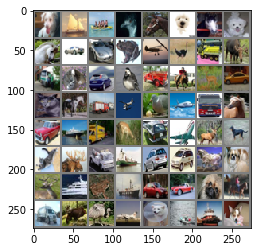

In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         Dropout2d-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,096
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        Dropout2d-14           [-1

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model, device, trainloader, optimizer,testloader, epoch):

  Model_train.train(model, device, trainloader, optimizer, epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [9]:
model =  Model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 16


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model, device, trainloader, optimizer,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2598613500595093 Batch_id=781 Accuracy=49.27: 100%|██████████| 782/782 [00:18<00:00, 42.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9723, Accuracy: 6553/10000 (65.53%)

EPOCH: 2


Loss=0.9913569688796997 Batch_id=781 Accuracy=66.64: 100%|██████████| 782/782 [00:18<00:00, 42.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7581, Accuracy: 7360/10000 (73.60%)

EPOCH: 3


Loss=0.6980620622634888 Batch_id=781 Accuracy=72.83: 100%|██████████| 782/782 [00:18<00:00, 43.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6834, Accuracy: 7629/10000 (76.29%)

EPOCH: 4


Loss=0.6020890474319458 Batch_id=781 Accuracy=79.03: 100%|██████████| 782/782 [00:18<00:00, 43.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5620, Accuracy: 8065/10000 (80.65%)

EPOCH: 5


Loss=0.6414356827735901 Batch_id=781 Accuracy=80.12: 100%|██████████| 782/782 [00:18<00:00, 43.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5455, Accuracy: 8142/10000 (81.42%)

EPOCH: 6


Loss=0.6983616352081299 Batch_id=781 Accuracy=81.03: 100%|██████████| 782/782 [00:17<00:00, 43.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5363, Accuracy: 8170/10000 (81.70%)

EPOCH: 7


Loss=0.3265191316604614 Batch_id=781 Accuracy=82.09: 100%|██████████| 782/782 [00:18<00:00, 43.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5322, Accuracy: 8195/10000 (81.95%)

EPOCH: 8


Loss=0.9049795269966125 Batch_id=781 Accuracy=82.06: 100%|██████████| 782/782 [00:18<00:00, 43.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5286, Accuracy: 8209/10000 (82.09%)

EPOCH: 9


Loss=0.5365692377090454 Batch_id=781 Accuracy=82.15: 100%|██████████| 782/782 [00:17<00:00, 43.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5269, Accuracy: 8206/10000 (82.06%)

EPOCH: 10


Loss=0.7830867171287537 Batch_id=781 Accuracy=82.34: 100%|██████████| 782/782 [00:18<00:00, 43.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5275, Accuracy: 8218/10000 (82.18%)

EPOCH: 11


Loss=0.5310303568840027 Batch_id=781 Accuracy=82.33: 100%|██████████| 782/782 [00:17<00:00, 43.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5309, Accuracy: 8200/10000 (82.00%)

EPOCH: 12


Loss=0.3266872763633728 Batch_id=781 Accuracy=82.28: 100%|██████████| 782/782 [00:17<00:00, 43.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5309, Accuracy: 8191/10000 (81.91%)

EPOCH: 13


Loss=0.5602531433105469 Batch_id=781 Accuracy=82.14: 100%|██████████| 782/782 [00:17<00:00, 44.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5275, Accuracy: 8213/10000 (82.13%)

EPOCH: 14


Loss=0.5168910622596741 Batch_id=781 Accuracy=82.21: 100%|██████████| 782/782 [00:17<00:00, 44.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5267, Accuracy: 8231/10000 (82.31%)

EPOCH: 15


Loss=0.4172564148902893 Batch_id=781 Accuracy=82.38: 100%|██████████| 782/782 [00:17<00:00, 43.77it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5262, Accuracy: 8230/10000 (82.30%)

EPOCH: 16


Loss=0.4525150656700134 Batch_id=781 Accuracy=82.21: 100%|██████████| 782/782 [00:17<00:00, 43.73it/s]



Test set: Average loss: 0.5282, Accuracy: 8223/10000 (82.23%)



GroundTruth:   bird plane truck plane


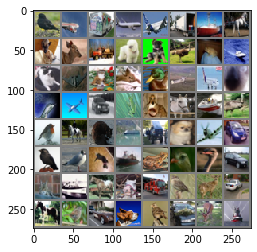

In [10]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   cat  ship plane


In [12]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 82 %


In [13]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,device)    

Accuracy of plane : 91 %
Accuracy of   car : 90 %
Accuracy of  bird : 79 %
Accuracy of   cat : 63 %
Accuracy of  deer : 74 %
Accuracy of   dog : 67 %
Accuracy of  frog : 92 %
Accuracy of horse : 84 %
Accuracy of  ship : 89 %
Accuracy of truck : 87 %
